# Rocha et. Al. (2020)


## Leitura dos resultados da simulação

Obtidos a partir da rotina de estimação de parâmetros


In [63]:
from modules.analysis.results_handler import ResultsHandler
import pathlib

results_path = pathlib.Path("./out/estimation_exp_large_range/sim_6830")

results_handler = ResultsHandler(simulation_path=results_path)

## Leitura dos resultados de referência - Rocha (2020)


In [64]:
import pandas as pd

data_path = pathlib.Path("./fixtures/validation/RochaData")

rocha_data = {}

for folder in data_path.iterdir():
    if folder.name in ["original"]:
        continue
    rocha_data[folder.name] = {}
    for file in folder.iterdir():
        data = pd.read_csv(file, sep=None)
        if data[data.columns[0]].to_numpy().max() > 1000:
            data[data.columns[0]] = data[data.columns[0]] / (3600 * 24)
        rocha_data[folder.name][file.name.replace(".csv", "")] = data

C:\Users\Pablo\AppData\Local\Temp\ipykernel_10212\267606640.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file, sep=None)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_10212\267606640.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file, sep=None)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_10212\267606640.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file, sep=None)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_10212\267606640.py:12: ParserWarning: Falling back to the 'python' engine because t

## Plot dos resultados


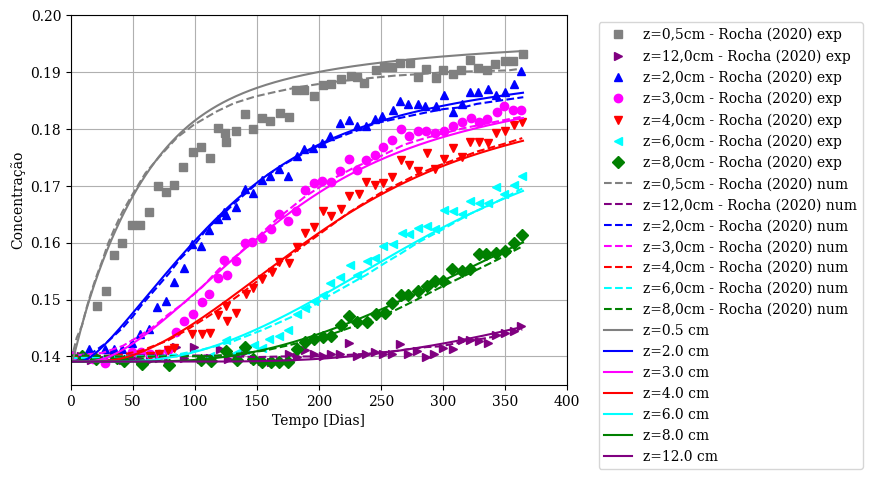

In [65]:
import matplotlib.pyplot as plt

colors: dict[str, str] = {
    "z=0,5cm": "gray",
    "z=2,0cm": "blue",
    "z=3,0cm": "magenta",
    "z=4,0cm": "red",
    "z=6,0cm": "cyan",
    "z=8,0cm": "green",
    "z=12,0cm": "purple",
}

markers: dict[str, str] = {
    "z=0,5cm": "s",
    "z=2,0cm": "^",
    "z=3,0cm": "o",
    "z=4,0cm": "v",
    "z=6,0cm": "<",
    "z=8,0cm": "D",
    "z=12,0cm": ">",
}

for data_type, profiles in [
    (k, v) for k, v in rocha_data.items() if k == "num" or k == "exp"
]:
    for profile_lbl, profile_df in profiles.items():
        plt.plot(
            profile_df["t"],
            profile_df["concentration"],
            color=colors[profile_lbl],
            label=f"{profile_lbl} - Rocha (2020) {data_type}",
            linestyle="dashed" if data_type == "num" else "None",
            marker=markers[profile_lbl] if data_type == "exp" else "None",
        )

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

time, concentration_profiles = results_handler.filter_for_positions(
    variable_name="Concentration", position_values=target_positions
)
time /= 3600 * 24
for position_lbl, concentration_arr in concentration_profiles.items():
    plt.plot(
        time,
        concentration_arr,
        label=position_lbl,
        color=colors[position_lbl.replace(".", ",").replace(" ", "")],
    )

plt.xlabel("Tempo [Dias]")
plt.xlim(0, 400)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel("Concentração")
plt.ylim(0.135, 0.2)
plt.grid()

plt.show()
plt.close()

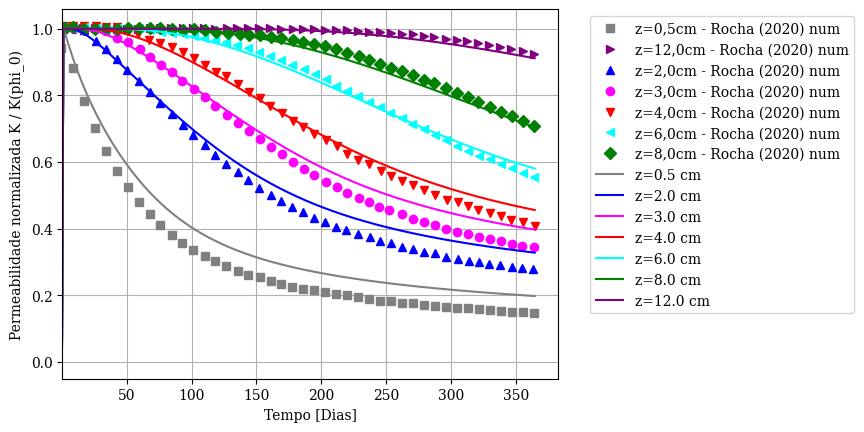

In [66]:
import matplotlib.pyplot as plt
from modules.simulation.config.model import SimulationConfigModel
from modules.simulation.functions import permeability
import numpy as np

plt.rcParams.update(
    {
        "text.usetex": False,
        "font.family": "serif",
    }
)

sim_cfg = SimulationConfigModel.from_file(results_path / "config.yaml")

for data_type, profiles in [
    (k, v) for k, v in rocha_data.items() if k == "permeability"
]:
    k_0 = permeability(np.array([0.1391]), 27.99, 0.58, 0.0000408, 0.192)
    for profile_lbl, profile_df in profiles.items():
        plt.plot(
            profile_df["t"],
            profile_df["permeability"] / k_0,
            color=colors[profile_lbl],
            label=f"{profile_lbl} - Rocha (2020) num",
            linestyle="None",
            marker=markers[profile_lbl],
        )

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

time, perm_profiles = results_handler.filter_for_positions(
    variable_name="Permeability", position_values=target_positions
)

for position_lbl, perm_arr in perm_profiles.items():
    k_0 = permeability(
        np.array([0.1391]),
        sim_cfg.equation_parameters.k0,
        sim_cfg.equation_parameters.delta,
        sim_cfg.solid_phase.particle_diam,
        sim_cfg.suspension.max_conc,
    )
    plt.plot(
        time / (3600 * 24),
        perm_arr / k_0,
        label=position_lbl,
        color=colors[position_lbl.replace(".", ",").replace(" ", "")],
    )

plt.xlabel("Tempo [Dias]")
plt.xlim(0.400)
plt.ylabel("Permeabilidade normalizada K / K(phi_0)")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.close()

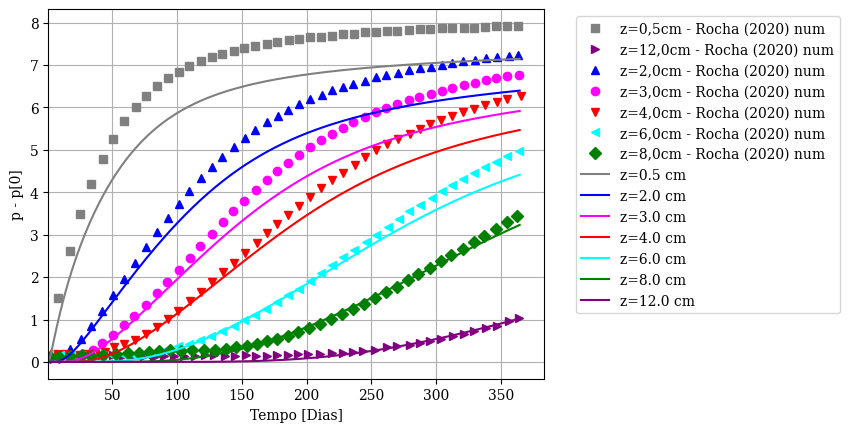

In [68]:
import matplotlib.pyplot as plt

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

sim_cfg = SimulationConfigModel.from_file(results_path / "config.yaml")

for data_type, profiles in [
    (k, v) for k, v in rocha_data.items() if k == "effective_pressure"
]:
    p_ref = 18.62 * np.exp((-0.19 * (1 / 0.1391 - 1 / 0.145)))
    for profile_lbl, profile_df in profiles.items():
        plt.plot(
            profile_df[profile_df.columns[0]],
            profile_df["effective_pressure"] - p_ref,
            color=colors[profile_lbl],
            label=f"{profile_lbl} - Rocha (2020) num",
            linestyle="None",
            marker=markers[profile_lbl],
        )

_, pressure_grad_profiles = results_handler.filter_for_positions(
    variable_name="Pressure_Gradient", position_values=target_positions
)
time, concentration_profiles = results_handler.filter_for_positions(
    variable_name="Concentration", position_values=target_positions
)

for position_lbl, concentration in concentration_profiles.items():
    effective_pressure = sim_cfg.equation_parameters.p_ref * np.exp(
        (
            -sim_cfg.equation_parameters.beta
            * (1 / concentration - 1 / sim_cfg.equation_parameters.ref_conc)
        )
    )
    plt.plot(
        time / (3600 * 24),
        effective_pressure - effective_pressure[0],
        label=position_lbl,
        color=colors[position_lbl.replace(".", ",").replace(" ", "")],
    )

plt.xlabel("Tempo [Dias]")
plt.xlim(0.400)
plt.ylabel("p - p[0]")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()